In [8]:
import tensorflow as tf
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [20]:
from tensorflow import set_random_seed
set_random_seed(42)
np.random.seed(42)

ImportError: cannot import name 'set_random_seed' from 'tensorflow' (/home/ilya/Programming_Bureau/Repositories/Python_course/.venv/lib/python3.8/site-packages/tensorflow/__init__.py)

In [21]:
from sklearn.model_selection import train_test_split
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout
from tensorflow.python.keras.callbacks import ModelCheckpoint

In [22]:
train = pd.read_csv('fashion-mnist_train.csv')

In [23]:
test = pd.read_csv('fashion-mnist_test.csv')

In [24]:
train.shape, test.shape

((60000, 785), (10000, 785))

In [25]:
x_train = train.drop('label', axis=1)/255
y_train = train.label
x_test = test.drop('label', axis=1)/255
y_test = test.label

In [26]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

In [27]:
y_train_labels = enc.fit_transform(np.reshape(np.array(y_train), (-1,1))).toarray()
y_test_labels = enc.transform(np.reshape(np.array(y_test), (-1,1))).toarray()

### Разделим нашу выборку на тестовую и валидационную

In [28]:
x_TRAIN, x_VALID, y_TRAIN, y_VALID = train_test_split(x_train, y_train_labels, test_size = 0.2, random_state=42)

__1. Логистическая регрессия__

In [18]:
log_checkpoint = ModelCheckpoint('log_model.h5', save_best_only=True, save_weights_only=True, mode='max', monitor='val_acc')
model_log = Sequential()
model_log.add(Dense(10, input_shape=(784,), activation='softmax'))
model_log.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])        
history = model_log.fit(x_TRAIN.values, y_TRAIN, batch_size=250, validation_data=(x_VALID.values, y_VALID),
                       callbacks=[log_checkpoint], epochs=10)

2022-06-03 14:41:30.324746: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-06-03 14:41:30.324790: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ilya-Vostro-14-5410): /proc/driver/nvidia/version does not exist
2022-06-03 14:41:30.325533: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10
192/192 [==============================] - 1s 2ms/step - loss: 1.4907 - accuracy: 0.5602 - val_loss: 1.0954 - val_accuracy: 0.6833
Epoch 2/10
192/192 [==============================] - 0s 747us/step - loss: 0.9839 - accuracy: 0.7024 - val_loss: 0.9006 - val_accuracy: 0.7210
Epoch 3/10
192/192 [==============================] - 0s 756us/step - loss: 0.8559 - accuracy: 0.7309 - val_loss: 0.8161 - val_accuracy: 0.7423
Epoch 4/10
192/192 [==============================] - 0s 750us/step - loss: 0.7891 - accuracy: 0.7506 - val_loss: 0.7645 - val_accuracy: 0.7564
Epoch 5/10
192/192 [==============================] - 0s 765us/step - loss: 0.7454 - accuracy: 0.7640 - val_loss: 0.7277 - val_accuracy: 0.7692
Epoch 6/10
192/192 [==============================] - 0s 751us/step - loss: 0.7135 - accuracy: 0.7719 - val_loss: 0.7002 - val_accuracy: 0.7767
Epoch 7/10
192/192 [==============================] - 0s 764us/step - loss: 0.6887 - accuracy: 0.7795 - val_loss: 0.6794 - val_accuracy: 0

#### Визуализация зависимости accuracy от количества эпох.

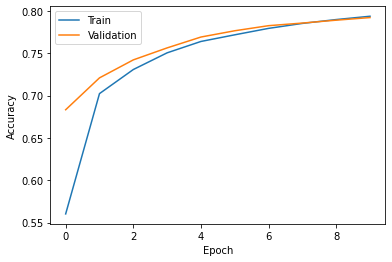

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

In [30]:
model_log.load_weights('log_model.h5')
_, score = model_log.evaluate(x_test.values, y_test_labels)
print("Логистическая регрессия   accuracy: {0:.3f}".format(score))

313/313 [==============================] - 0s 379us/step - loss: 0.6359 - accuracy: 0.8000
Логистическая регрессия   accuracy: 0.800


__2. Полносвязная нейронная сеть__

In [31]:
nn_checkpoint = ModelCheckpoint('nn_model.h5', save_best_only=True, save_weights_only=True, mode='max', monitor='val_acc')
model_nn = Sequential()
model_nn.add(Dense(512, activation='relu', input_shape=(784,)))
model_nn.add(Dropout(0.2))
model_nn.add(Dense(512, activation='relu'))
model_nn.add(Dropout(0.2))
model_nn.add(Dense(10, activation='softmax'))

model_nn.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=['accuracy'])

history_nn = model_nn.fit(x_TRAIN.values, y_TRAIN, batch_size=500, validation_data=(x_VALID.values, y_VALID),
                       callbacks=[nn_checkpoint], epochs=20)


Epoch 1/20
96/96 [==============================] - 1s 11ms/step - loss: 2.3301 - accuracy: 0.1077 - val_loss: 2.2575 - val_accuracy: 0.1408
Epoch 2/20
96/96 [==============================] - 1s 10ms/step - loss: 2.2605 - accuracy: 0.1436 - val_loss: 2.1846 - val_accuracy: 0.1982
Epoch 3/20
96/96 [==============================] - 1s 10ms/step - loss: 2.1923 - accuracy: 0.1898 - val_loss: 2.1147 - val_accuracy: 0.3017
Epoch 4/20
96/96 [==============================] - 1s 10ms/step - loss: 2.1295 - accuracy: 0.2400 - val_loss: 2.0467 - val_accuracy: 0.4287
Epoch 5/20
96/96 [==============================] - 1s 11ms/step - loss: 2.0672 - accuracy: 0.2957 - val_loss: 1.9799 - val_accuracy: 0.5329
Epoch 6/20
96/96 [==============================] - 1s 10ms/step - loss: 2.0033 - accuracy: 0.3610 - val_loss: 1.9142 - val_accuracy: 0.5889
Epoch 7/20
96/96 [==============================] - 1s 10ms/step - loss: 1.9436 - accuracy: 0.4089 - val_loss: 1.8501 - val_accuracy: 0.6184
Epoch 8/20
96

#### Визуализация зависимости accuracy от количества эпох.

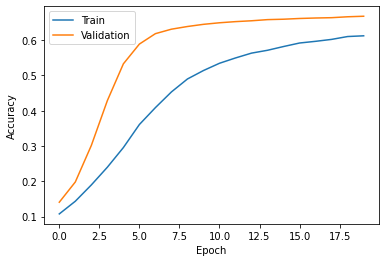

In [32]:
plt.plot(history_nn.history['accuracy'])
plt.plot(history_nn.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

In [33]:
model_nn.load_weights('nn_model.h5')
_, score = model_nn.evaluate(x_test.values, y_test_labels)
print("Полносвязная нейронная сеть   accuracy: {0:.3f}".format(score))

313/313 [==============================] - 0s 761us/step - loss: 0.2878 - accuracy: 0.8951
Полносвязная нейронная сеть   accuracy: 0.895


#### По результатам оценок двух моделей видно что полносвязная нейронная сеть в силу своей сложности по отношению к логистической регрессии показала лучший Score

__3. Сверточная нейронная сеть__

In [34]:
x_TRAIN_reshaped = x_TRAIN.values.reshape(48000, 28, 28, 1)
x_VALID_reshaped = x_VALID.values.reshape(12000, 28, 28, 1)
x_TEST_reshaped = x_test.values.reshape(10000, 28, 28, 1)

In [35]:
cnn_1_checkpoint = ModelCheckpoint('cnn1_model.h5', save_best_only=True, save_weights_only=True, mode='max', monitor='val_acc')
model_cnn_1 = tf.keras.models.Sequential()
model_cnn_1.add(tf.keras.layers.Convolution2D(32, (3,3), input_shape=(28, 28, 1), activation='relu'))
model_cnn_1.add(tf.keras.layers.MaxPooling2D((2,2)))
model_cnn_1.add(tf.keras.layers.Convolution2D(64, (3,3), activation='relu'))
model_cnn_1.add(tf.keras.layers.MaxPooling2D((2,2)))
model_cnn_1.add(tf.keras.layers.Flatten())
model_cnn_1.add(tf.keras.layers.Dense(64, activation='relu'))
model_cnn_1.add(tf.keras.layers.Dense(10, activation='softmax'))

model_cnn_1.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=['accuracy'])

history_cnn1 = model_cnn_1.fit(x_TRAIN_reshaped, y_TRAIN, batch_size=500, validation_data=(x_VALID_reshaped, y_VALID),
                       callbacks=[cnn_1_checkpoint], epochs=10)

Epoch 1/10
96/96 [==============================] - 5s 52ms/step - loss: 2.2897 - accuracy: 0.1401 - val_loss: 2.2868 - val_accuracy: 0.1519
Epoch 2/10
96/96 [==============================] - 5s 56ms/step - loss: 2.2852 - accuracy: 0.1504 - val_loss: 2.2822 - val_accuracy: 0.1612
Epoch 3/10
96/96 [==============================] - 5s 53ms/step - loss: 2.2803 - accuracy: 0.1585 - val_loss: 2.2772 - val_accuracy: 0.1678
Epoch 4/10
96/96 [==============================] - 5s 53ms/step - loss: 2.2752 - accuracy: 0.1665 - val_loss: 2.2718 - val_accuracy: 0.1741
Epoch 5/10
96/96 [==============================] - 5s 54ms/step - loss: 2.2697 - accuracy: 0.1743 - val_loss: 2.2663 - val_accuracy: 0.1818
Epoch 6/10
96/96 [==============================] - 5s 56ms/step - loss: 2.2642 - accuracy: 0.1830 - val_loss: 2.2607 - val_accuracy: 0.1960
Epoch 7/10
96/96 [==============================] - 5s 56ms/step - loss: 2.2584 - accuracy: 0.1964 - val_loss: 2.2548 - val_accuracy: 0.2079
Epoch 8/10
96

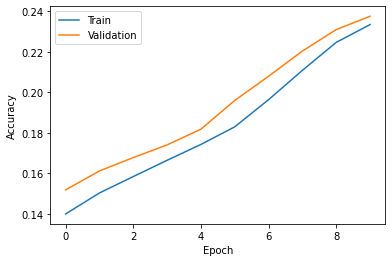

In [37]:
plt.plot(history_cnn1.history['accuracy'])
plt.plot(history_cnn1.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

In [38]:
model_cnn_1.load_weights('cnn1_model.h5')
_, score = model_cnn_1.evaluate(x_TEST_reshaped, y_test_labels)
print("Сверточная нейронная сеть-1   accuracy: {0:.3f}".format(score))

313/313 [==============================] - 1s 2ms/step - loss: 0.3086 - accuracy: 0.8918
Сверточная нейронная сеть-1   accuracy: 0.892


#### Тут уже сверточная нейронная сеть проявила себя лучше с помощью 10-ти эпох!

In [39]:
cnn_2_checkpoint = ModelCheckpoint('cnn2_model.h5', save_best_only=True, save_weights_only=True, mode='max', monitor='val_acc')
model_cnn_2 = tf.keras.models.Sequential()
model_cnn_2.add(tf.keras.layers.Convolution2D(32, (3,3), input_shape=(28, 28, 1), activation='relu'))
model_cnn_2.add(tf.keras.layers.Convolution2D(32, (3,3), activation='relu'))
model_cnn_2.add(tf.keras.layers.MaxPooling2D((2,2)))
model_cnn_2.add(tf.keras.layers.Convolution2D(64, (3,3), activation='relu'))
model_cnn_2.add(tf.keras.layers.Convolution2D(64, (3,3), activation='relu'))
model_cnn_2.add(tf.keras.layers.MaxPooling2D((2,2)))
model_cnn_2.add(tf.keras.layers.Flatten())
model_cnn_2.add(tf.keras.layers.Dense(128, activation='relu'))
model_cnn_2.add(tf.keras.layers.Dense(64, activation='relu'))
model_cnn_2.add(tf.keras.layers.Dense(10, activation='softmax'))

model_cnn_2.compile(optimizer='adadelta',loss='categorical_crossentropy', metrics=['accuracy'])
    
history_cnn2 = model_cnn_2.fit(x_TRAIN_reshaped, y_TRAIN, batch_size=500, validation_data=(x_VALID_reshaped, y_VALID),
                       callbacks=[cnn_2_checkpoint], epochs=10)

Epoch 1/10
96/96 [==============================] - 14s 144ms/step - loss: 2.3055 - accuracy: 0.0856 - val_loss: 2.3031 - val_accuracy: 0.0942
Epoch 2/10
96/96 [==============================] - 14s 147ms/step - loss: 2.3005 - accuracy: 0.1006 - val_loss: 2.2984 - val_accuracy: 0.0956
Epoch 3/10
96/96 [==============================] - 14s 151ms/step - loss: 2.2960 - accuracy: 0.1010 - val_loss: 2.2944 - val_accuracy: 0.0957
Epoch 4/10
96/96 [==============================] - 15s 153ms/step - loss: 2.2924 - accuracy: 0.1010 - val_loss: 2.2911 - val_accuracy: 0.0959
Epoch 5/10
96/96 [==============================] - 15s 154ms/step - loss: 2.2891 - accuracy: 0.1011 - val_loss: 2.2878 - val_accuracy: 0.0960
Epoch 6/10
96/96 [==============================] - 16s 162ms/step - loss: 2.2858 - accuracy: 0.1014 - val_loss: 2.2844 - val_accuracy: 0.0964
Epoch 7/10
96/96 [==============================] - 15s 158ms/step - loss: 2.2822 - accuracy: 0.1026 - val_loss: 2.2808 - val_accuracy: 0.0987

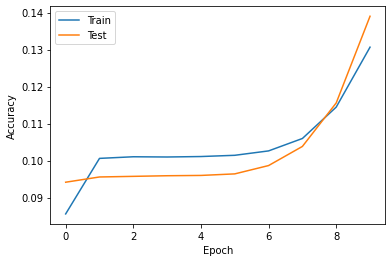

In [41]:
plt.plot(history_cnn2.history['accuracy'])
plt.plot(history_cnn2.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

In [42]:
model_cnn_2.load_weights('cnn2_model.h5')
_, score = model_cnn_2.evaluate(x_TEST_reshaped, y_test_labels)
print("Сверточная нейронная сеть-2   accuracy: {0:.3f}".format(score))

313/313 [==============================] - 1s 4ms/step - loss: 0.2714 - accuracy: 0.8972
Сверточная нейронная сеть-2   accuracy: 0.897


### Добавление Batch Normalization слоев

In [43]:
cnn_3_checkpoint = ModelCheckpoint('cnn3_model.h5', save_best_only=True, save_weights_only=True, mode='max', monitor='val_acc')
model_cnn_3b = tf.keras.models.Sequential()
model_cnn_3b.add(tf.keras.layers.Convolution2D(32, (3,3), input_shape=(28, 28, 1), activation='relu'))
model_cnn_3b.add(tf.keras.layers.BatchNormalization())
model_cnn_3b.add(tf.keras.layers.Convolution2D(32, (3,3), activation='relu'))
model_cnn_3b.add(tf.keras.layers.BatchNormalization())
model_cnn_3b.add(tf.keras.layers.MaxPooling2D((2,2)))
model_cnn_3b.add(tf.keras.layers.Convolution2D(64, (3,3), activation='relu'))
model_cnn_3b.add(tf.keras.layers.BatchNormalization())
model_cnn_3b.add(tf.keras.layers.Convolution2D(64, (3,3), activation='relu'))
model_cnn_3b.add(tf.keras.layers.BatchNormalization())
model_cnn_3b.add(tf.keras.layers.MaxPooling2D((2,2)))
model_cnn_3b.add(tf.keras.layers.Flatten())
model_cnn_3b.add(tf.keras.layers.Dense(128, activation='relu'))
model_cnn_3b.add(tf.keras.layers.Dense(32, activation='relu'))
model_cnn_3b.add(tf.keras.layers.Dense(10, activation='softmax'))

model_cnn_3b.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
    
history_cnn3 = model_cnn_3b.fit(x_TRAIN_reshaped, y_TRAIN, batch_size=500, validation_data=(x_VALID_reshaped, y_VALID),
                       callbacks=[cnn_3_checkpoint], epochs=5)


Epoch 1/5
96/96 [==============================] - 17s 175ms/step - loss: 0.5542 - accuracy: 0.8084 - val_loss: 2.4308 - val_accuracy: 0.1613
Epoch 2/5
96/96 [==============================] - 17s 180ms/step - loss: 0.2954 - accuracy: 0.8939 - val_loss: 2.6063 - val_accuracy: 0.1338
Epoch 3/5
96/96 [==============================] - 17s 181ms/step - loss: 0.2391 - accuracy: 0.9131 - val_loss: 3.0476 - val_accuracy: 0.2573
Epoch 4/5
96/96 [==============================] - 18s 186ms/step - loss: 0.2065 - accuracy: 0.9257 - val_loss: 1.8577 - val_accuracy: 0.5172
Epoch 5/5
96/96 [==============================] - 18s 188ms/step - loss: 0.1720 - accuracy: 0.9388 - val_loss: 0.9590 - val_accuracy: 0.7103


In [50]:
print(history_cnn3)

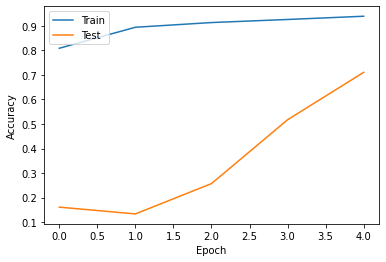

In [45]:
plt.plot(history_cnn3.history['accuracy'])
plt.plot(history_cnn3.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

In [46]:
model_cnn_3b.load_weights('cnn3_model.h5')
_, score = model_cnn_3b.evaluate(x_TEST_reshaped, y_test_labels)
print("Сверточная нейронная сеть-3   accuracy: {0:.3f}".format(score))

313/313 [==============================] - 2s 5ms/step - loss: 0.2890 - accuracy: 0.9121
Сверточная нейронная сеть-3   accuracy: 0.912
